#Scikitlearn

##1. Classification

In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

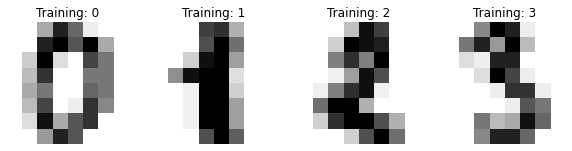

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)
clf2 = svm.SVC(gamma=0.005)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train) #mencoba fitting dengan gamma jadi 0.005

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
predicted2 = clf2.predict(X_test) #mencoba predict dengan gamma jadi 0.005

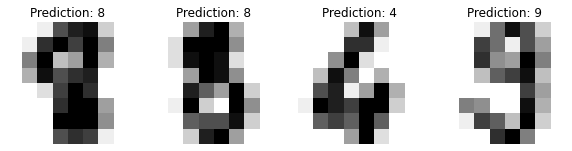

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


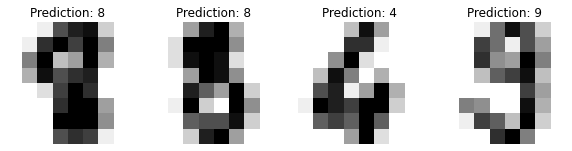

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction2 in zip(axes, X_test, predicted2):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction2}")


In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [ ]:
print(
    f"Classification report for classifier {clf2}:\n"
    f"{metrics.classification_report(y_test, predicted2)}\n"
)

Classification report for classifier SVC(gamma=0.005):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        88
           1       1.00      0.90      0.95        91
           2       1.00      0.84      0.91        86
           3       0.99      0.80      0.88        91
           4       1.00      0.80      0.89        92
           5       0.97      0.97      0.97        91
           6       0.99      0.92      0.95        91
           7       1.00      0.83      0.91        89
           8       0.48      1.00      0.65        88
           9       0.95      0.88      0.92        92

    accuracy                           0.89       899
   macro avg       0.94      0.89      0.90       899
weighted avg       0.94      0.89      0.90       899




Dari kedua report di atas dapat dilihat dengan gamma 0.001 memiliki presisi yang lebih besar dari gamma 0.005 akan tetapi pada f1-score nya berkurang jauh sehingga tingkat akurasinya pun berkurang secara signifikan. Dapat dilihat pula bahwa angka 8 pada train dengan gamma 0.005 memiliki presisi yang sangat jauh dibandingkan train dengan gamma 0.001 .

##2. Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


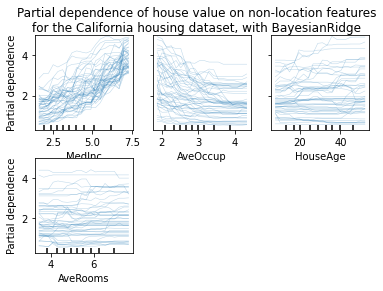

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.inspection import plot_partial_dependence

X, y = fetch_california_housing(return_X_y=True, as_frame=True)
features = ["MedInc", "AveOccup", "HouseAge", "AveRooms"]
est = RandomForestRegressor(n_estimators=10)
est.fit(X, y)
display = plot_partial_dependence(
    est,
    X,
    features,
    kind="individual",
    subsample=50,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
)
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with BayesianRidge"
)
display.figure_.subplots_adjust(hspace=0.3)

Mencari keterkaitan dari value suatu rumah yang tidak berdasarkan lokasi (ruangan, umur rumah, dll) pada dataset scikit learn california house dengan regresi metode BayesianRidge

##3. Clustering

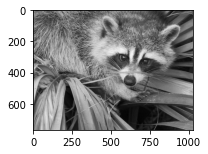

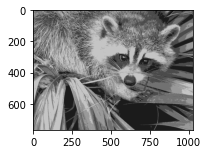

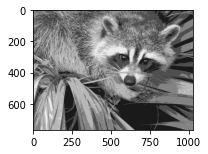

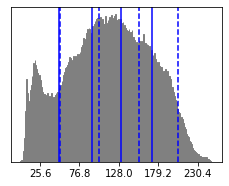

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import cluster


try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face

    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

n_clusters = 5
np.random.seed(0)

X = face.reshape((-1, 1))  # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_

# create an array from labels and values
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

# original face
plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

# compressed face
plt.figure(2, figsize=(3, 2.2))
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# equal bins face
regular_values = np.linspace(0, 256, n_clusters + 1)
regular_labels = np.searchsorted(regular_values, face) - 1
regular_values = 0.5 * (regular_values[1:] + regular_values[:-1])  # mean
regular_face = np.choose(regular_labels.ravel(), regular_values, mode="clip")
regular_face.shape = face.shape
plt.figure(3, figsize=(3, 2.2))
plt.imshow(regular_face, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

# histogram
plt.figure(4, figsize=(3, 2.2))
plt.clf()
plt.axes([0.01, 0.01, 0.98, 0.98])
plt.hist(X, bins=256, color=".5", edgecolor=".5")
plt.yticks(())
plt.xticks(regular_values)
values = np.sort(values)
for center_1, center_2 in zip(values[:-1], values[1:]):
    plt.axvline(0.5 * (center_1 + center_2), color="b")

for center_1, center_2 in zip(regular_values[:-1], regular_values[1:]):
    plt.axvline(0.5 * (center_1 + center_2), color="b", linestyle="--")

plt.show()

Clustering pada gambar rakun yakni daerah mana pada gambar tersebut yang terdapat wajah rakun. Hasilnya dapat dilihat di histogram seperti di atas 